# US Twitter Sentiment on Climate Change



###1. Import Libraries

In [0]:
!pip install -q langdetect

import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
import re
import scipy as sp
import time

from langdetect import detect_langs
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import re

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###2. Read Dataset to DataFrame

In [0]:
# Read Train and Test Dataset
df_tweet = pd.read_csv('kaggleTweets_cleaned_undersamplig_dupl_Stopwords.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /G


 1    3827
-1    3815
 2    3793
 0    3601
Name: sentiment, dtype: int64


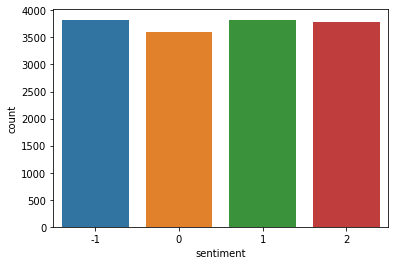

In [0]:
print(df_tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data=df_tweet)
plt.show()

###3. Data Exploratory Analysis 

In [0]:
print (df_tweet.info())
df_tweet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15036 non-null  int64  
 1   level_0            15036 non-null  int64  
 2   index              15036 non-null  int64  
 3   sentiment          15036 non-null  int64  
 4   message            15036 non-null  object 
 5   tweetid            15036 non-null  int64  
 6   num_char           15036 non-null  int64  
 7   num_word           15036 non-null  int64  
 8   ave_word_length    15036 non-null  float64
 9   punctuation_count  15036 non-null  int64  
 10  num_punctuation    15036 non-null  int64  
 11  message_toc        15036 non-null  object 
 12  message_lem        15036 non-null  object 
 13  message_len_str    15036 non-null  object 
 14  language           15036 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 1.7+ MB
None


,Unnamed: 0,level_0,index,sentiment,message,tweetid,num_char,num_word,ave_word_length,punctuation_count,num_punctuation,message_toc,message_lem,message_len_str,language
0,0,34070,36971,-1,potus greatest threat to national security is...,603754676421558273,138,21,6.571429,20,20,"['potus', 'greatest', 'threat', 'to', 'nationa...","['potus', 'greatest', 'threat', 'to', 'nationa...","['potus', 'greatest', 'threat', 'to', 'nationa...",en
1,1,35164,38067,-1,rt youngcons obama just posted the dumbest pic...,639235846357581824,124,14,8.857143,12,12,"['rt', 'youngcons', 'obama', 'just', 'posted',...","['rt', 'youngcons', 'obama', 'just', 'posted',...","['rt', 'youngcons', 'obama', 'just', 'posted',...",en
2,2,10749,13639,-1,rt americanpapist since cold weather can never...,835177799866585088,137,23,5.956522,4,5,"['rt', 'americanpapist', 'since', 'cold', 'wea...","['rt', 'americanpapist', 'since', 'cold', 'wea...","['rt', 'americanpapist', 'since', 'cold', 'wea...",en
3,3,37450,40354,-1,rt fredzeppelin on this raging lunatic lecture...,685880670653145089,140,24,5.833333,4,5,"['rt', 'fredzeppelin', 'on', 'this', 'raging',...","['rt', 'fredzeppelin', 'on', 'this', 'raging',...","['rt', 'fredzeppelin', 'on', 'this', 'raging',...",en
4,4,38929,41835,-1,the middle of the nevada desert mi from death ...,730847952147763200,144,22,6.545455,9,9,"['the', 'middle', 'of', 'the', 'nevada', 'dese...","['the', 'middle', 'of', 'the', 'nevada', 'dese...","['the', 'middle', 'of', 'the', 'nevada', 'dese...",en


###4. Train_Validation_Test Data Split

In [0]:
df_tweet_copy = df_tweet.copy()

def data_split(df):
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=5678)
    #df_test, df_val = train_test_split(df_test, test_size=0.5, random_state=5678) 
    return df_train, df_test

df_train, df_test= data_split(df_tweet_copy)
print (df_train.info())
print (df_test.info())
print (type(df_train))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12028 entries, 5721 to 2164
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12028 non-null  int64  
 1   level_0            12028 non-null  int64  
 2   index              12028 non-null  int64  
 3   sentiment          12028 non-null  int64  
 4   message            12028 non-null  object 
 5   tweetid            12028 non-null  int64  
 6   num_char           12028 non-null  int64  
 7   num_word           12028 non-null  int64  
 8   ave_word_length    12028 non-null  float64
 9   punctuation_count  12028 non-null  int64  
 10  num_punctuation    12028 non-null  int64  
 11  message_toc        12028 non-null  object 
 12  message_lem        12028 non-null  object 
 13  message_len_str    12028 non-null  object 
 14  language           12028 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 1.5+ MB
None
<class

In [0]:
train_x = df_train.message_len_str.to_list()
train_y = df_train.sentiment.to_list()
test_x = df_test.message_len_str.to_list()
test_y = df_test.sentiment.to_list()
print (len(train_x))
print (len(train_y))
print (len(test_x))
print (len(test_y))
print (type(train_x))

12028
12028
3008
3008
<class 'list'>


###5. Model Train, Validate and Hyperparameter Tuning

####5.1 MultinomialNB model 

In [0]:
from sklearn.naive_bayes import MultinomialNB
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 999)

def MultinomialNB_model(features, target):
    #features = df.message.to_list()
    #target = df.sentiment.to_list()

    pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('cls', MultinomialNB()),
    ])
    
    # gridsearch to tune hyperparameters 
    p_grid = {
    'vect__ngram_range': [(1, 1),(1,2)],
    'tfidf__use_idf': (True, False),
    'cls__alpha': [0.001,0.005,0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'cls__class_prior' : [None, [.1,.9],[.2, .8]], 
    'cls__fit_prior' : [True, False]
    }

    classifier = GridSearchCV(estimator=pipe, param_grid=p_grid, verbose=0, scoring = 'accuracy', n_jobs=-1, cv=skf.split(features, target)).fit(features, target)
    return classifier.best_estimator_, classifier.best_score_, classifier.best_params_, classifier.cv_results_

 
%time NB_best_estimator, NB_best_score,  NB_best_params, NB_cv_results = MultinomialNB_model(train_x, train_y)
print("The training accuracy score are: {:.2f}".format(NB_best_score))
print("The best params are: -")
for param_name in sorted(NB_best_params.keys()):
  print("%s: %r" % (param_name, NB_best_params[param_name]))

CPU times: user 2min 58s, sys: 2.13 s, total: 3min
Wall time: 11min 8s
The training accuracy score are: 0.66
The best params are: -
cls__alpha: 0.2
cls__class_prior: None
cls__fit_prior: False
tfidf__use_idf: True
vect__ngram_range: (1, 2)


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

pred_y = NB_best_estimator.predict(test_x)

print('accuracy %s' % accuracy_score(pred_y, test_y))
print(classification_report(test_y, pred_y))

accuracy 0.6486037234042553
              precision    recall  f1-score   support

          -1       0.67      0.76      0.71       769
           0       0.62      0.37      0.47       731
           1       0.57      0.64      0.60       727
           2       0.72      0.81      0.76       781

    accuracy                           0.65      3008
   macro avg       0.64      0.64      0.63      3008
weighted avg       0.64      0.65      0.64      3008



####5.2 Logit Regression Model

In [0]:
from sklearn.linear_model import LogisticRegression
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 999)

def LogitReg_model(features, target):

    pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('cls', LogisticRegression()),
    ])
    
    # gridsearch to tune hyperparameters 
    p_grid = {
    'vect__ngram_range': [(1, 1), (1,2)],
    'vect__max_features': [2000000],
    'vect__vocabulary':[None],
    'tfidf__use_idf': (True, False),
    'cls__penalty' : ['l1', 'l2'],
    'cls__C' : [0.01, 0.1, 1, 10, 100, 1000],
    'cls__solver' : ['newton-cg', 'lbfgs','liblinear']
    }

    classifier = GridSearchCV(estimator=pipe, param_grid=p_grid, verbose=0, scoring = 'accuracy', n_jobs=-1, cv=skf.split(features, target)).fit(features, target)
    return classifier.best_estimator_, classifier.best_score_, classifier.best_params_,classifier.cv_results_

%time LG_best_estimator, LG_best_score,  LG_best_params, LG_cv_results = LogitReg_model(train_x, train_y)
print("The training accuracy score are: {:.2f}".format(LG_best_score))
print("The best params are: -")
for param_name in sorted(LG_best_params.keys()):
  print("%s: %r" % (param_name, LG_best_params[param_name]))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 1min 26s, sys: 1.93 s, total: 1min 28s
Wall time: 16min 4s
The training accuracy score are: 0.67
The best params are: -
cls__C: 1000
cls__penalty: 'l2'
cls__solver: 'liblinear'
tfidf__use_idf: True
vect__max_features: 2000000
vect__ngram_range: (1, 2)
vect__vocabulary: None


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

pred_y = LG_best_estimator.predict(test_x)

print('accuracy %s' % accuracy_score(pred_y, test_y))
print(classification_report(test_y, pred_y))
#print (NB_best_estimator.get_params)

accuracy 0.6632313829787234
              precision    recall  f1-score   support

          -1       0.74      0.71      0.72       769
           0       0.61      0.49      0.54       731
           1       0.56      0.65      0.60       727
           2       0.74      0.80      0.77       781

    accuracy                           0.66      3008
   macro avg       0.66      0.66      0.66      3008
weighted avg       0.66      0.66      0.66      3008



###6.3 Linear Support Vector Machine Model




In [0]:
from sklearn.linear_model import SGDClassifier
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 999)

def SGD_model(features, target):

    pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('cls', SGDClassifier(penalty='l2', random_state=8, tol=None)),
    ])
    
    # gridsearch to tune hyperparameters 
    p_grid = {
    'vect__ngram_range': [(1, 1),(1,2)],
    'tfidf__use_idf': (True, False),
    'cls__alpha' : [1e-1,1e-2,1e-3,1e-4,1e-5],    
    'cls__max_iter' : [1,10,100,1000,2000],
    'cls__loss' : ['hinge','modified_huber']  
    }

    classifier = GridSearchCV(estimator=pipe, param_grid=p_grid, verbose=0, scoring = 'accuracy', n_jobs=-1, cv=skf.split(features, target)).fit(features, target)
    return classifier.best_estimator_, classifier.best_score_, classifier.best_params_, classifier.cv_results_

%time SGD_best_estimator, SGD_best_score,  SGD_best_params, SGD_cv_results = SGD_model(train_x, train_y)
print("The training accuracy score are: {:.2f}".format(SGD_best_score))
print("The best params are: -")
for param_name in sorted(SGD_best_params.keys()):
  print("%s: %r" % (param_name, SGD_best_params[param_name]))


CPU times: user 2min, sys: 1.16 s, total: 2min 2s
Wall time: 1h 3min 3s
The training accuracy score are: 0.67
The best params are: -
cls__alpha: 0.0001
cls__loss: 'modified_huber'
cls__max_iter: 10
tfidf__use_idf: True
vect__ngram_range: (1, 2)


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

pred_y = SGD_best_estimator.predict(test_x)

print('accuracy %s' % accuracy_score(pred_y, test_y))
print(classification_report(test_y, pred_y))
#print (NB_best_estimator.get_params)

accuracy 0.6602393617021277
              precision    recall  f1-score   support

          -1       0.72      0.71      0.72       769
           0       0.62      0.46      0.53       731
           1       0.57      0.64      0.60       727
           2       0.72      0.82      0.76       781

    accuracy                           0.66      3008
   macro avg       0.66      0.66      0.65      3008
weighted avg       0.66      0.66      0.66      3008

